In [1]:
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import metview as mv
import matplotlib.pyplot as plt

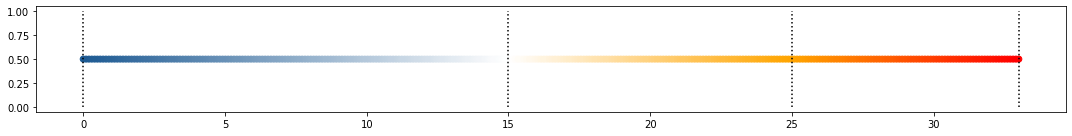

In [5]:


cm1 = LinearSegmentedColormap.from_list("blue_white", ["#1d5a93", "w"])
cm2 = LinearSegmentedColormap.from_list("white_orange", ["w", "orange"])
cm3 = LinearSegmentedColormap.from_list("orange_red", ["orange", "red"])

# minimal value
vmin = 0
# first split
split1 = 15
# second split
split2 = 25
# maximum value
vmax = 33

# factor to transform limits to number of colors
multiplier = 10
# total number of colors used in the colormap
ncolors = (vmax - vmin) * multiplier
# get number of individual colors for each colormap
ncolors1 = (split1 - vmin) * multiplier
ncolors2 = (split2 - split1) * multiplier
ncolors3 = ncolors - ncolors1 - ncolors2

# evaluate colors
c1 = cm1(np.linspace(0, 1, ncolors1))
c2 = cm2(np.linspace(0, 1, ncolors2))
c3 = cm3(np.linspace(0, 1, ncolors3))

# setup triple-linear colormap
cmap = LinearSegmentedColormap.from_list("triple_linear", [*c1, *c2, *c3])

#----------------------------------------------------------------------
# %%  quick check of resulting colormap
x = np.linspace(vmin, vmax, ncolors)

f, ax = plt.subplots(figsize=(15, 2))
s = ax.scatter(x, [0.5]*len(x), c=x, cmap=cmap)
for i in [vmin, split1, split2, vmax]:
    ax.plot([i]*2, [0, 1], "k:")
f.tight_layout()

In [2]:
data_rf=mv.retrieve(
            Class     ="od",
            stream    ="oper",
            expver    =1,
            date      =-1,
            time      =0,
            step      =72,
            number    =0,
            type      ="fc",
            levtype   ="sfc",
            levellist =0,
            param     =["i10fg"]
  )

In [6]:
collist = []

for c in [c1,c2,c3]:
    for i in c:
        collist.append("RGB("+str(i[0])+","+str(i[1])+","+str(i[2])+")")
#print(clist)

In [14]:
clist = list(x)
print(x)
contour= mv.mcont(
    LEGEND                      = "on",
    CONTOUR                     = 'Off',
    CONTOUR_LEVEL_SELECTION_TYPE = 'LEVEL_LIST',
    CONTOUR_LINE_COLOUR         = 'BLACK',
    CONTOUR_SHADE               = 'ON',
    CONTOUR_SHADE_COLOUR_METHOD = 'LIST',
    contour_shade_technique     = 'cell_shading',
    contour_shade_cell_resolution = 100,
    contour_shade_cell_method   = 'nearest',
    CONTOUR_HIGHLIGHT           = 'OFF',
    CONTOUR_HILO                = 'OFF',
    GRIB_SCALING_OF_DERIVED_FIELDS = 'OFF',
    CONTOUR_LABEL               = 'OFF',
    CONTOUR_LABEL_COLOUR        = 'BLACK',
    CONTOUR_LEVEL_LIST          =  clist,
    CONTOUR_MIN_VALUE           =  clist[0],
    CONTOUR_MAX_VALUE           =  clist[-1],
    CONTOUR_SHADE_COLOUR_LIST   = list(collist)
)

coastlines = mv.mcoast(
    map_coastline_land_shade        = "on",
    map_coastline_land_shade_colour = "grey"
    )

# Importing : /diag/rubbish/Geographical View

gview = mv.geoview(
    map_area_definition = "corners",
    area                = [60,-110,0,0],  
    #area                = [50,-60,30,-40],       
    coastlines          = coastlines
    )
legend = mv.mlegend(
           legend_text_font_size     = 0.5,
           )


[ 0.          0.10030395  0.2006079   0.30091185  0.40121581  0.50151976
  0.60182371  0.70212766  0.80243161  0.90273556  1.00303951  1.10334347
  1.20364742  1.30395137  1.40425532  1.50455927  1.60486322  1.70516717
  1.80547112  1.90577508  2.00607903  2.10638298  2.20668693  2.30699088
  2.40729483  2.50759878  2.60790274  2.70820669  2.80851064  2.90881459
  3.00911854  3.10942249  3.20972644  3.3100304   3.41033435  3.5106383
  3.61094225  3.7112462   3.81155015  3.9118541   4.01215805  4.11246201
  4.21276596  4.31306991  4.41337386  4.51367781  4.61398176  4.71428571
  4.81458967  4.91489362  5.01519757  5.11550152  5.21580547  5.31610942
  5.41641337  5.51671733  5.61702128  5.71732523  5.81762918  5.91793313
  6.01823708  6.11854103  6.21884498  6.31914894  6.41945289  6.51975684
  6.62006079  6.72036474  6.82066869  6.92097264  7.0212766   7.12158055
  7.2218845   7.32218845  7.4224924   7.52279635  7.6231003   7.72340426
  7.82370821  7.92401216  8.02431611  8.12462006  8.

In [15]:
%time
psfile = "test_cell"

mv.setoutput(mv.png_output(output_name = psfile))
mv.plot(gview,data_rf,contour,legend)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.1 µs
